# PAD-UFES-20 dataset analysis
In this kernel, we performe some EDA for the PAD-UFES-20 dataset. For more information, please refer to the paper.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/pad_ufes_20.csv")
data.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


# Stats

Getting the number of samples for each diagnosis and the % of biopsy-proven

In [2]:
grouped = data.groupby(['diagnostic'])

total = 0
total_bio = 0
for g in grouped:
    print("-"*10)
    print("Diagnostic:", g[0])
    g = g[1]
    _total = len(g)
    _total_bio = len(g[g['biopsed']])
    print("# of samples:", _total)
    print("% biopsed:", 100 * (_total_bio/_total))
    print("-"*10)
    total += _total
    total_bio += _total_bio
    
print("*"*10)
print("# Total:", total)
print("% biopsed:", 100 * (total_bio/total))
    

----------
Diagnostic: ACK
# of samples: 730
% biopsed: 24.383561643835616
----------
----------
Diagnostic: BCC
# of samples: 845
% biopsed: 100.0
----------
----------
Diagnostic: MEL
# of samples: 52
% biopsed: 100.0
----------
----------
Diagnostic: NEV
# of samples: 244
% biopsed: 24.59016393442623
----------
----------
Diagnostic: SCC
# of samples: 192
% biopsed: 100.0
----------
----------
Diagnostic: SEK
# of samples: 235
% biopsed: 6.382978723404255
----------
**********
# Total: 2298
% biopsed: 58.39860748476936


# Age distribution
Checking the age distribution for all patients and splitted by gender

<Figure size 432x288 with 0 Axes>

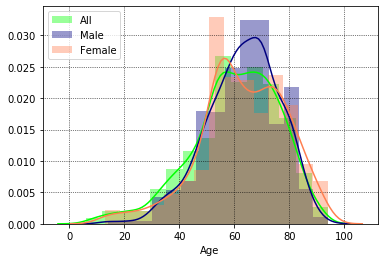

<Figure size 432x288 with 0 Axes>

In [4]:
kde = True
male = data[ data['gender'] == 'MALE' ]
female = data[ data['gender'] == 'FEMALE' ]


sns.distplot(data['age'], color="lime", label='All', kde=kde, bins=15)
sns.distplot(male['age'], color="navy", label='Male', kde=kde, bins=15)
sns.distplot(female['age'], color="coral", label='Female', kde=kde, bins=15)
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Age")
plt.legend(['All', 'Male', 'Female'], loc='upper left')
plt.savefig("../figures/age_distribution.png", dpi=300)
plt.figure()


# Age boxplots

Checking the age bloxplots per diagnostic

<Figure size 432x288 with 0 Axes>

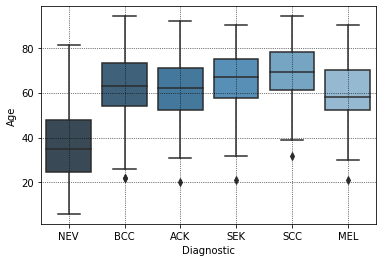

<Figure size 432x288 with 0 Axes>

In [5]:
sns.boxplot(y='age', x='diagnostic', data=data, palette="Blues_d")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Diagnostic")
plt.ylabel("Age")
plt.savefig("../figures/age_boxplot.png", dpi=300)
plt.figure()


# Anatomical region
Checking the frequency of each anatomical region per diagnostic

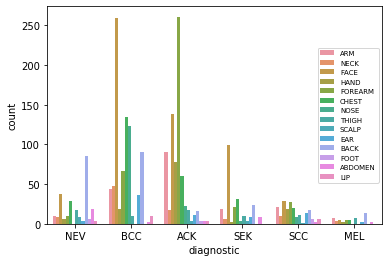

In [6]:
x = sns.countplot(x="diagnostic", hue="region", data=data)
plt.legend(loc='right', prop={'size': 7})
plt.savefig('../figures/regions_per_diag.png', dpi = 300)

Checking the frequency of each anatomical region

<Figure size 432x288 with 0 Axes>

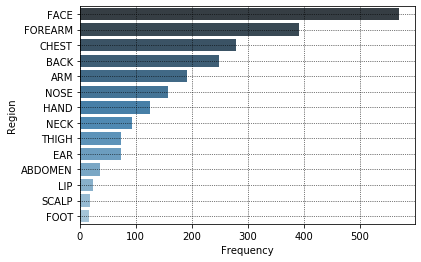

<Figure size 432x288 with 0 Axes>

In [7]:
x = data.groupby(['region']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.savefig("../figures/region_frequency.png", dpi=300)
plt.figure()


# Family background

Father:

<Figure size 432x288 with 0 Axes>

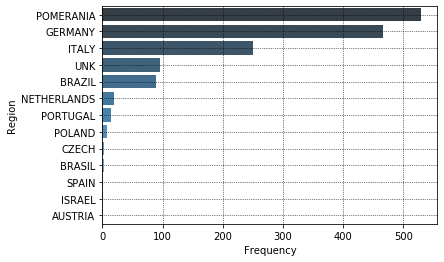

<Figure size 432x288 with 0 Axes>

In [8]:
x = data.groupby(['background_father']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.savefig("../figures/fam_back_father_frequency.png", dpi=300)
plt.figure()

Mother:

<Figure size 432x288 with 0 Axes>

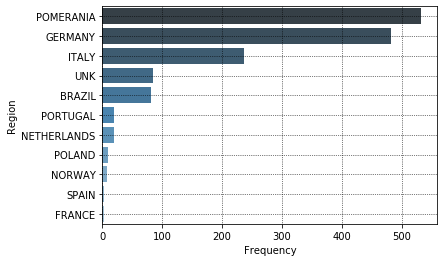

<Figure size 432x288 with 0 Axes>

In [9]:
x = data.groupby(['background_mother']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.savefig("../figures/fam_back_mother_frequency.png", dpi=300)
plt.figure()